# MNIST (sophisticated version)

## 1) 필요한 모듈을 호출해옵니다

In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import random
import matplotlib.pyplot as plt

## 2) 재현성을 위해 manual seed를 고정시킵니다

In [2]:
torch.manual_seed(1)
random.seed(1)

## 3) 학습모델에 필요한 parameter를 설정합니다

In [10]:
learning_rate = 1e-5
epochs = 15
batch_size = 100
drop_prob = 0.3

## 4) 학습, 테스트셋을 불러옵니다 

In [28]:
mnist_train = dsets.MNIST(root='MNIST_data/',
                         train=True,
                         transform=transforms.ToTensor(),
                         download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                        train=False,
                        transform=transforms.ToTensor(),
                        download=True)

## 5) minibatch 학습을 위해 학습셋을 data loader에 담아둡니다

In [5]:
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                         batch_size=batch_size,
                                         shuffle=True,
                                         drop_last=True)

## 6) 모델을 순차적으로 구성합니다

## 6-1) layer 생성

In [6]:
linear1 = nn.Linear(28*28, 512, bias=True)
linear2 = nn.Linear(512, 512, bias=True)
linear3 = nn.Linear(512, 512, bias=True)
linear4 = nn.Linear(512, 512, bias=True)
linear5 = nn.Linear(512, 10, bias=True)

## 6-2) batch normalization 설정

In [17]:
bn1 = nn.BatchNorm1d(512)
bn2 = nn.BatchNorm1d(512)
bn3 = nn.BatchNorm1d(512)
bn4 = nn.BatchNorm1d(512)

## 6-3) activation function 지정

In [18]:
relu = nn.ReLU()

## 6-4) drop out 설정

In [19]:
dropout = nn.Dropout(p=drop_prob)

## 6-5) xavier initialization 실행

In [20]:
nn.init.xavier_uniform_(linear1.weight)
nn.init.xavier_uniform_(linear2.weight)
nn.init.xavier_uniform_(linear3.weight)
nn.init.xavier_uniform_(linear4.weight)
nn.init.xavier_uniform_(linear5.weight)

Parameter containing:
tensor([[-0.0062,  0.0919,  0.0401,  ...,  0.0947,  0.0152,  0.0836],
        [-0.1033,  0.0740, -0.1042,  ..., -0.0101, -0.1031,  0.0913],
        [ 0.0159,  0.0725, -0.0175,  ...,  0.0040, -0.0089,  0.0846],
        ...,
        [ 0.0346, -0.0231, -0.0486,  ..., -0.0093,  0.0555, -0.0069],
        [ 0.0428,  0.0078,  0.1065,  ...,  0.0770, -0.0763, -0.0529],
        [ 0.0188,  0.1003,  0.0487,  ..., -0.0199,  0.0350,  0.0018]],
       requires_grad=True)

## 6-6) model 구축

In [21]:
model = nn.Sequential(linear1, bn1, relu, dropout,
                     linear2, bn2, relu, dropout,
                     linear3, bn3, relu, dropout,
                     linear4, bn4, relu, dropout,
                     linear5)

## 7) 학습 전 loss function과 optimizer를 지정해줍니다

In [22]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

## 8) for문을 돌면서 training을 시작합니다

In [23]:
total_batch = len(data_loader)
model.train()
for epoch in range(1, epochs+1):
    avg_loss = 0
    
    for x_train, y_train in data_loader:
        x_train = x_train.view(-1, 28*28)
        
        prediction = model(x_train)
        
        loss = loss_function(prediction, y_train)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        avg_loss += loss / total_batch
        
    print('epoch: {:5d}/{} >>> loss: {:.6f}'.format(epoch, epochs, avg_loss.item()))
    
print('learning finished')

epoch:     1/15 >>> loss: 2.040840
epoch:     2/15 >>> loss: 1.189549
epoch:     3/15 >>> loss: 0.844580
epoch:     4/15 >>> loss: 0.668496
epoch:     5/15 >>> loss: 0.564478
epoch:     6/15 >>> loss: 0.492442
epoch:     7/15 >>> loss: 0.450266
epoch:     8/15 >>> loss: 0.409527
epoch:     9/15 >>> loss: 0.381354
epoch:    10/15 >>> loss: 0.357957
epoch:    11/15 >>> loss: 0.336629
epoch:    12/15 >>> loss: 0.316045
epoch:    13/15 >>> loss: 0.308771
epoch:    14/15 >>> loss: 0.289843
epoch:    15/15 >>> loss: 0.281586
learning finished


## 9) 학습된 모델을 평가합니다

C:\Users\Dojun Park\AppData\Local\Continuum\anaconda3\envs\python36\lib\site-packages\torchvision\datasets\mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
C:\Users\Dojun Park\AppData\Local\Continuum\anaconda3\envs\python36\lib\site-packages\torchvision\datasets\mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


0.9416999816894531
Label:  1
Prediction:  1


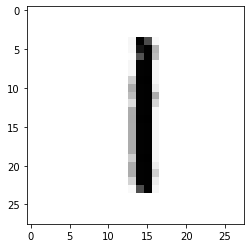

In [30]:
with torch.no_grad():
    model.eval()
    x_test = mnist_test.test_data.view(-1, 28*28).float()
    y_test = mnist_test.test_labels
    
    prediction = model(x_test)
    correct = torch.argmax(prediction, 1) == y_test
    accuracy = correct.float().mean()
    print(accuracy.item())
    
    r = random.randint(0, len(mnist_test)-1)
    x_random_data = mnist_test.test_data[r:r+1].view(-1, 28*28).float()
    y_random_data = mnist_test.test_labels[r:r+1]
    
    print('Label: ', y_random_data.item())
    single_prediction = model(x_random_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())
    
    plt.imshow(mnist_test.test_data[r:r+1].view(28,28), cmap='Greys', interpolation='nearest')
    plt.show()